# Imports

In [1]:
import pandas as pd
import numpy as np
import datetime # to handle date/time attributes
from os import listdir # os is a module for interacting with the OS
from os.path import isfile, join # to verify file object, and concatenate paths
import glob # to find pathnames matching a specific pattern
import re # regular expressions :)
import matplotlib.pyplot as plt
import math
import scipy.stats as st
import sqlite3 as sql

%matplotlib inline

# Reading Tables

In [2]:
MatchDF = pd.read_csv('Match.csv')
Team = pd.read_csv('Team.csv')
PlayerDF = pd.read_csv('Player.csv')
TeamAtt = pd.read_csv('Team_Attributes.csv')
Player_Attributes = pd.read_csv('Player_Attributes.csv')

# Cleaning Match Table

In [3]:
match_to_drop = [ 'home_player_X1','home_player_X2','home_player_X3','home_player_X4','home_player_X5','home_player_X6','home_player_X7','home_player_X8','home_player_X9','home_player_X10','home_player_X11',
            'away_player_X1' ,'away_player_X2' ,'away_player_X3' ,'away_player_X4' ,'away_player_X5' ,'away_player_X6' ,'away_player_X7' ,'away_player_X8' ,'away_player_X9' ,'away_player_X10' ,'away_player_X11',
            'home_player_Y1','home_player_Y2','home_player_Y3','home_player_Y4','home_player_Y5','home_player_Y6','home_player_Y7','home_player_Y8','home_player_Y9','home_player_Y10','home_player_Y11',
            'away_player_Y1' ,'away_player_Y2' ,'away_player_Y3' ,'away_player_Y4' ,'away_player_Y5' ,'away_player_Y6' ,'away_player_Y7' ,'away_player_Y8' ,'away_player_Y9' ,'away_player_Y10','away_player_Y11',
            'B365H','B365D','B365A',
            'BWH','BWD','BWA',
            'IWH','IWD','IWA',
            'LBH','LBD','LBA',
            'PSH','PSD','PSA',
            'SJH','SJD','SJA',
            'VCH','VCD','VCA',
            'GBH','GBD','GBA',
            'BSH','BSD','BSA',
            'WHH','WHD','WHA']

Match = MatchDF.drop(match_to_drop, axis=1)
Match = Match.dropna()
Match = Match.reset_index(drop="True")

Match['date'] = pd.to_datetime(Match['date']).dt.normalize()

Match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
0,1729,1729,1729,2008/2009,1,2008-08-17,489042,10260,10261,1,...,34574.0,37799.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...
1,1730,1729,1729,2008/2009,1,2008-08-16,489043,9825,8659,1,...,25922.0,27267.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...
2,1731,1729,1729,2008/2009,1,2008-08-16,489044,8472,8650,0,...,24635.0,30853.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...
3,1732,1729,1729,2008/2009,1,2008-08-16,489045,8654,8528,2,...,127857.0,34466.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...
4,1734,1729,1729,2008/2009,1,2008-08-16,489047,8668,8655,2,...,34176.0,30646.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>46</comment><event...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13320,25945,24558,24558,2015/2016,36,2016-05-25,1992225,9931,9956,0,...,80564.0,289472.0,<goal><value><comment>o</comment><stats><owngo...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />
13321,25946,24558,24558,2015/2016,36,2016-05-25,1992226,7896,10190,3,...,92094.0,35831.0,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />
13322,25947,24558,24558,2015/2016,36,2016-05-25,1992227,10199,10179,2,...,427439.0,38601.0,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />
13323,25948,24558,24558,2015/2016,36,2016-05-25,1992228,10191,10192,0,...,71764.0,37554.0,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />


# Cleaning Player Table

In [4]:
PlayerDF['birthday'] = pd.to_datetime(PlayerDF['birthday']).dt.normalize()
player_to_drop = ['player_fifa_api_id']

Player = PlayerDF.drop(player_to_drop, axis=1)
Player = Player.dropna()

Player

,id,player_api_id,player_name,birthday,height,weight
0,1,505942,Aaron Appindangoye,1992-02-29,182.88,187
1,2,155782,Aaron Cresswell,1989-12-15,170.18,146
2,3,162549,Aaron Doran,1991-05-13,170.18,163
3,4,30572,Aaron Galindo,1982-05-08,182.88,198
4,5,23780,Aaron Hughes,1979-11-08,182.88,154
...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,1979-04-03,182.88,168
11056,11072,111182,Zsolt Laczko,1986-12-18,182.88,176
11057,11073,36491,Zsolt Low,1979-04-29,180.34,154
11058,11074,35506,Zurab Khizanishvili,1981-10-06,185.42,172


# Cleaning Player Attributes Table

In [5]:
Player_Attributes['date'] = pd.to_datetime(Player_Attributes['date']).dt.normalize()

Player_Attributes = Player_Attributes.drop(player_to_drop, axis=1)

Player_Attributes = Player_Attributes.dropna()

Player_Attributes

,id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,39902,2009-08-30,83.0,85.0,right,medium,low,84.0,77.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,39902,2009-02-22,78.0,80.0,right,medium,low,74.0,76.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,39902,2008-08-30,77.0,80.0,right,medium,low,74.0,71.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,39902,2007-08-30,78.0,81.0,right,medium,low,74.0,64.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


# Cleaning Team Attributes Table

In [6]:
TeamAtt['date'] = pd.to_datetime(TeamAtt['date']).dt.normalize()

teamatt_to_drop = ['team_fifa_api_id']

TeamAtt = TeamAtt.drop(teamatt_to_drop, axis=1)
TeamAtt = TeamAtt.dropna()

TeamAtt

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1,2,9930,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,9930,2015-09-10,47,Balanced,41.0,Normal,54,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
7,8,8485,2014-09-19,58,Balanced,64.0,Normal,62,Mixed,Organised,...,57,Normal,Organised,41,Medium,42,Press,60,Normal,Cover
8,9,8485,2015-09-10,59,Balanced,64.0,Normal,53,Mixed,Organised,...,63,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover
13,14,8576,2014-09-19,59,Balanced,57.0,Normal,52,Mixed,Organised,...,52,Normal,Organised,38,Medium,47,Press,53,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,1450,8394,2015-09-10,52,Balanced,52.0,Normal,50,Mixed,Organised,...,57,Normal,Organised,48,Medium,43,Press,49,Normal,Cover
1450,1451,8027,2014-09-19,54,Balanced,51.0,Normal,40,Mixed,Organised,...,52,Normal,Organised,44,Medium,47,Press,52,Normal,Cover
1451,1452,8027,2015-09-10,54,Balanced,51.0,Normal,40,Mixed,Organised,...,52,Normal,Organised,44,Medium,47,Press,52,Normal,Cover
1456,1457,10000,2014-09-19,54,Balanced,42.0,Normal,51,Mixed,Organised,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


# Cleaning Teams Table

In [7]:
team_to_drop = ['team_fifa_api_id']

Team = Team.drop(team_to_drop, axis=1)
Team = Team.dropna()

Team

,id,team_api_id,team_long_name,team_short_name
0,1,9987,KRC Genk,GEN
1,2,9993,Beerschot AC,BAC
2,3,10000,SV Zulte-Waregem,ZUL
3,4,9994,Sporting Lokeren,LOK
4,5,9984,KSV Cercle Brugge,CEB
...,...,...,...,...
294,49479,10190,FC St. Gallen,GAL
295,49837,10191,FC Thun,THU
296,50201,9777,Servette FC,SER
297,50204,7730,FC Lausanne-Sports,LAU


# <span style="color:red">1) Does the average age of the team affect the team's build up play speed?</span>

In [8]:
Match['match_api_id'].is_unique

True

In [9]:
DF1 = Match.loc[:, ['match_api_id','home_team_api_id','away_team_api_id','date',
                'home_player_2','home_player_3','home_player_4','home_player_5','home_player_6','home_player_7','home_player_8','home_player_9','home_player_10','home_player_11',
                'away_player_2','away_player_3','away_player_4','away_player_5','away_player_6','away_player_7','away_player_8','away_player_9','away_player_10','away_player_11']]

DF1

,match_api_id,home_team_api_id,away_team_api_id,date,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,489042,10260,10261,2008-08-17,30362.0,30620.0,30865.0,32569.0,24148.0,34944.0,...,25518.0,24228.0,30929.0,29581.0,38807.0,40565.0,30360.0,33852.0,34574.0,37799.0
1,489043,9825,8659,2008-08-16,26111.0,38835.0,30986.0,31291.0,31013.0,30935.0,...,36832.0,23115.0,37280.0,24728.0,24664.0,31088.0,23257.0,24171.0,25922.0,27267.0
2,489044,8472,8650,2008-08-16,38836.0,24446.0,24408.0,36786.0,38802.0,24655.0,...,37442.0,30617.0,24134.0,414792.0,37139.0,30618.0,40701.0,24800.0,24635.0,30853.0
3,489045,8654,8528,2008-08-16,30966.0,23818.0,37277.0,30687.0,36394.0,37169.0,...,34987.0,35472.0,111865.0,25005.0,35327.0,25150.0,97988.0,41877.0,127857.0,34466.0
4,489047,8668,8655,2008-08-16,30371.0,24004.0,33086.0,30857.0,24011.0,109058.0,...,37764.0,19020.0,23921.0,24136.0,30342.0,23889.0,23916.0,23922.0,34176.0,30646.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13320,1992225,9931,9956,2016-05-25,458806.0,705484.0,22834.0,181211.0,438780.0,114738.0,...,274779.0,177689.0,696435.0,42258.0,173936.0,39979.0,614540.0,291106.0,80564.0,289472.0
13321,1992226,7896,10190,2016-05-25,282287.0,429986.0,41415.0,114212.0,340790.0,491221.0,...,678384.0,638592.0,413155.0,210423.0,45780.0,176298.0,119839.0,566785.0,92094.0,35831.0
13322,1992227,10199,10179,2016-05-25,114792.0,150007.0,178119.0,42294.0,32343.0,260708.0,...,67349.0,450493.0,32597.0,140495.0,106559.0,25840.0,634310.0,95230.0,427439.0,38601.0
13323,1992228,10191,10192,2016-05-25,239959.0,67304.0,320183.0,42257.0,93223.0,133126.0,...,25843.0,108451.0,25815.0,733787.0,25860.0,245161.0,320184.0,45174.0,71764.0,37554.0


In [10]:
players_bd = Player.loc[:,['player_api_id','birthday']]

avg_age_df = Match.loc[:, ['match_api_id','date',
                'home_player_2','home_player_3','home_player_4','home_player_5','home_player_6','home_player_7','home_player_8','home_player_9','home_player_10','home_player_11',
                'away_player_2','away_player_3','away_player_4','away_player_5','away_player_6','away_player_7','away_player_8','away_player_9','away_player_10','away_player_11'
               ]]

df3 = pd.merge(avg_age_df, players_bd, left_on="home_player_2", right_on="player_api_id")
df3['age_h2'] = df3['date'].dt.year - df3['birthday'].dt.year
df3 = df3.drop(['home_player_2','player_api_id','birthday'], axis=1)

for i in range(3,12):
    df3 = pd.merge(df3, players_bd, left_on="home_player_"+str(i), right_on="player_api_id")
    df3['age_h'+str(i)] = df3['date'].dt.year - df3['birthday'].dt.year
    df3 = df3.drop(['home_player_'+str(i),'player_api_id','birthday'], axis=1)


###############################################################################################


for i in range(2,12):
    df3 = pd.merge(df3, players_bd, left_on="away_player_"+str(i), right_on="player_api_id")
    df3['age_a'+str(i)] = df3['date'].dt.year - df3['birthday'].dt.year
    df3 = df3.drop(['away_player_'+str(i),'player_api_id','birthday'], axis=1)

avg_age_df["avg_age_home_team"] = df3[['age_h2','age_h3','age_h4','age_h5','age_h6','age_h7','age_h8','age_h9','age_h10','age_h11']].mean(axis=1)
avg_age_df["avg_age_away_team"] = df3[['age_a2','age_a3','age_a4','age_a5','age_a6','age_a7','age_a8','age_a9','age_a10','age_a11']].mean(axis=1)


avg_age_df

,match_api_id,date,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,...,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,avg_age_home_team,avg_age_away_team
0,489042,2008-08-17,30362.0,30620.0,30865.0,32569.0,24148.0,34944.0,30373.0,24154.0,...,30929.0,29581.0,38807.0,40565.0,30360.0,33852.0,34574.0,37799.0,27.7,25.5
1,489043,2008-08-16,26111.0,38835.0,30986.0,31291.0,31013.0,30935.0,39297.0,26181.0,...,37280.0,24728.0,24664.0,31088.0,23257.0,24171.0,25922.0,27267.0,27.0,26.3
2,489044,2008-08-16,38836.0,24446.0,24408.0,36786.0,38802.0,24655.0,17866.0,30352.0,...,24134.0,414792.0,37139.0,30618.0,40701.0,24800.0,24635.0,30853.0,28.8,27.1
3,489045,2008-08-16,30966.0,23818.0,37277.0,30687.0,36394.0,37169.0,24223.0,24773.0,...,111865.0,25005.0,35327.0,25150.0,97988.0,41877.0,127857.0,34466.0,26.1,27.3
4,489047,2008-08-16,30371.0,24004.0,33086.0,30857.0,24011.0,109058.0,23268.0,24846.0,...,23921.0,24136.0,30342.0,23889.0,23916.0,23922.0,34176.0,30646.0,24.7,25.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13320,1992225,2016-05-25,458806.0,705484.0,22834.0,181211.0,438780.0,114738.0,25794.0,34035.0,...,696435.0,42258.0,173936.0,39979.0,614540.0,291106.0,80564.0,289472.0,26.3,24.5
13321,1992226,2016-05-25,282287.0,429986.0,41415.0,114212.0,340790.0,491221.0,8893.0,406283.0,...,413155.0,210423.0,45780.0,176298.0,119839.0,566785.0,92094.0,35831.0,25.7,25.5
13322,1992227,2016-05-25,114792.0,150007.0,178119.0,42294.0,32343.0,260708.0,92252.0,95257.0,...,32597.0,140495.0,106559.0,25840.0,634310.0,95230.0,427439.0,38601.0,27.6,26.0
13323,1992228,2016-05-25,239959.0,67304.0,320183.0,42257.0,93223.0,133126.0,112981.0,67389.0,...,25815.0,733787.0,25860.0,245161.0,320184.0,45174.0,71764.0,37554.0,24.5,24.6


In [11]:
mergerDF = avg_age_df.loc[:,['match_api_id','avg_age_home_team','avg_age_away_team']]

mergerDF2 = pd.merge(mergerDF, DF1)

finalDF = mergerDF2.loc[:,['home_team_api_id','avg_age_home_team','away_team_api_id','avg_age_away_team']]

finalDF

,home_team_api_id,avg_age_home_team,away_team_api_id,avg_age_away_team
0,10260,27.7,10261,25.5
1,9825,27.0,8659,26.3
2,8472,28.8,8650,27.1
3,8654,26.1,8528,27.3
4,8668,24.7,8655,25.8
...,...,...,...,...
13320,9931,26.3,9956,24.5
13321,7896,25.7,10190,25.5
13322,10199,27.6,10179,26.0
13323,10191,24.5,10192,24.6


In [12]:
home_df = finalDF.groupby(["home_team_api_id"])
home_df = home_df.aggregate({'avg_age_home_team': ['mean']})

away_df = finalDF.groupby(["away_team_api_id"])
away_df = away_df.aggregate({'avg_age_away_team': ['mean']})

home_and_away_df = pd.merge(home_df, away_df, left_index=True, right_index=True)

home_and_away_df["avg_age_per_team_in_8_seasons"] = home_and_away_df[['avg_age_home_team','avg_age_away_team']].mean(axis=1)

home_and_away_df = home_and_away_df.loc[:,["avg_age_per_team_in_8_seasons"]]

home_and_away_df.reset_index(level=0, inplace=True)

home_and_away_df = home_and_away_df.rename(columns={'home_team_api_id':'team_id'})

home_and_away_df

,team_id,avg_age_per_team_in_8_seasons
,,
0,4087,27.195935
1,6269,27.278297
2,6391,26.813158
3,6413,27.275351
4,6433,26.608333
...,...,...
188,10269,26.911640
189,10278,26.836111
190,10281,26.845588


In [13]:
home_and_away_df['team_id'].is_unique

True

In [14]:
speed_df = pd.merge(home_and_away_df, TeamAtt, left_on="team_id", right_on="team_api_id")
speed_df = speed_df.rename(columns={list(speed_df)[0]:'team_id' ,list(speed_df)[1]: 'average_age'})

speed_df = speed_df.groupby(["team_id"])
speed_df = speed_df.aggregate({'buildUpPlaySpeed': ['mean']})

speed_df.reset_index(level=0, inplace=True)

speed_df

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,team_id,buildUpPlaySpeed
,,mean
0,4087,59.5
1,6269,66.0
2,6391,48.0
3,6413,51.0
4,6433,56.5
...,...,...
184,10269,56.5
185,10278,53.0
186,10281,49.0


In [15]:
q3_df = pd.merge(speed_df,Team,left_on="team_id",right_on="team_api_id")
q3_df = q3_df.rename(columns={list(q3_df)[0]:'team_id' ,list(q3_df)[1]: 'buildUpPlaySpeed'})

q3_df = pd.merge(home_and_away_df, q3_df,left_on="team_id",right_on="team_api_id")
q3_df = q3_df.rename(columns={list(q3_df)[0]:'team_id' ,list(q3_df)[1]: 'average_age'})


q3_df = q3_df.loc[:,['team_long_name','team_short_name','average_age','buildUpPlaySpeed']]

q3_df = q3_df.sort_values(by='average_age', ascending=True)
# q3_df = q3_df.sort_values(by='buildUpPlaySpeed', ascending=True)

q3_df

,team_long_name,team_short_name,average_age,buildUpPlaySpeed
157,Grasshopper Club Zürich,GRA,25.301111,50.0
177,FC Zürich,ZUR,25.325000,62.0
155,FC Basel,BAS,25.345000,61.0
166,BSC Young Boys,YB,25.425000,52.0
168,FC Luzern,LUZ,25.505000,63.0
...,...,...,...,...
21,FC Ingolstadt 04,ING,27.494118,54.5
125,Dijon FCO,DIJ,27.509066,51.0
44,N.E.C.,NEC,27.654762,49.0
36,CD Numancia,NUM,27.850000,44.0


In [16]:
q3_df = q3_df.groupby(pd.cut(q3_df["average_age"], np.arange(25, 28.5, 0.5))).mean()

q3_df_to_drop = ['average_age']
q3_df = q3_df.drop(q3_df_to_drop, axis=1)

q3_df = q3_df.reset_index()

q3_df

,average_age,buildUpPlaySpeed
0,"(25.0, 25.5]",56.250000
1,"(25.5, 26.0]",56.714286
2,"(26.0, 26.5]",51.107143
3,"(26.5, 27.0]",54.239130
4,"(27.0, 27.5]",54.000000
5,"(27.5, 28.0]",52.125000


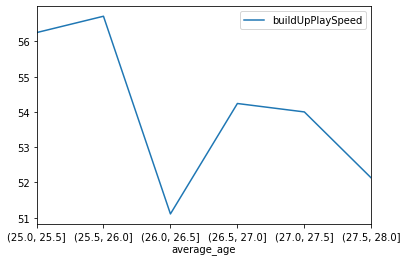

In [17]:
lines = q3_df.plot.line(x='average_age', y='buildUpPlaySpeed')

# <span style="color:red">2) Does a team's winning percentage increase at a home game than at an away game?</span>

In [18]:
new_df = MatchDF[["id" , "home_team_api_id","away_team_api_id","home_team_goal","away_team_goal"]]

new_df

,id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,9987,9993,1,1
1,2,10000,9994,0,0
2,3,9984,8635,0,3
3,4,9991,9998,5,0
4,5,7947,9985,1,3
...,...,...,...,...,...
25974,25975,10190,10191,1,0
25975,25976,9824,10199,1,2
25976,25977,9956,10179,2,0
25977,25978,7896,10243,0,0


In [19]:
new_df = pd.merge(new_df, Team, how='left', left_on='home_team_api_id', right_on='team_api_id')
new_df.head()

,id_x,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_y,team_api_id,team_long_name,team_short_name
0,1,9987,9993,1,1,1,9987,KRC Genk,GEN
1,2,10000,9994,0,0,3,10000,SV Zulte-Waregem,ZUL
2,3,9984,8635,0,3,5,9984,KSV Cercle Brugge,CEB
3,4,9991,9998,5,0,7,9991,KAA Gent,GEN
4,5,7947,9985,1,3,9,7947,FCV Dender EH,DEN


In [20]:
new_df.columns = ['matchID', 'home_team_api_id' , 'away_team_api_id' , 'home_team_goal' , 'away_team_goal' ,'team_id' ,'team_api_id' , 'home_team_long_name' ,'home_team_short_name']

new_df.head()

,matchID,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_id,team_api_id,home_team_long_name,home_team_short_name
0,1,9987,9993,1,1,1,9987,KRC Genk,GEN
1,2,10000,9994,0,0,3,10000,SV Zulte-Waregem,ZUL
2,3,9984,8635,0,3,5,9984,KSV Cercle Brugge,CEB
3,4,9991,9998,5,0,7,9991,KAA Gent,GEN
4,5,7947,9985,1,3,9,7947,FCV Dender EH,DEN


In [21]:
new_df = new_df.drop(['team_id','team_api_id'], axis=1)
new_df.head()

,matchID,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_long_name,home_team_short_name
0,1,9987,9993,1,1,KRC Genk,GEN
1,2,10000,9994,0,0,SV Zulte-Waregem,ZUL
2,3,9984,8635,0,3,KSV Cercle Brugge,CEB
3,4,9991,9998,5,0,KAA Gent,GEN
4,5,7947,9985,1,3,FCV Dender EH,DEN


In [22]:
new_df = pd.merge(new_df, Team, how='left', left_on='away_team_api_id', right_on='team_api_id')
new_df.head()

,matchID,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_long_name,home_team_short_name,id,team_api_id,team_long_name,team_short_name
0,1,9987,9993,1,1,KRC Genk,GEN,2,9993,Beerschot AC,BAC
1,2,10000,9994,0,0,SV Zulte-Waregem,ZUL,4,9994,Sporting Lokeren,LOK
2,3,9984,8635,0,3,KSV Cercle Brugge,CEB,6,8635,RSC Anderlecht,AND
3,4,9991,9998,5,0,KAA Gent,GEN,8,9998,RAEC Mons,MON
4,5,7947,9985,1,3,FCV Dender EH,DEN,10,9985,Standard de Liège,STL


In [23]:
new_df.columns = ['matchID', 'home_team_api_id' , 'away_team_api_id' , 'home_team_goal' , 'away_team_goal' , 'home_team_long_name' ,'home_team_short_name' , 'id' ,'team_api_id' , 'away_team_long_name' ,'away_team_short_name']
new_df = new_df.drop(['id','team_api_id'], axis=1)
new_df.head()

,matchID,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_long_name,home_team_short_name,away_team_long_name,away_team_short_name
0,1,9987,9993,1,1,KRC Genk,GEN,Beerschot AC,BAC
1,2,10000,9994,0,0,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK
2,3,9984,8635,0,3,KSV Cercle Brugge,CEB,RSC Anderlecht,AND
3,4,9991,9998,5,0,KAA Gent,GEN,RAEC Mons,MON
4,5,7947,9985,1,3,FCV Dender EH,DEN,Standard de Liège,STL


In [24]:
new_df['homeTeamWon'] = np.where((new_df.home_team_goal > new_df.away_team_goal),1,0)
new_df['awayTeamWon'] = np.where((new_df.home_team_goal < new_df.away_team_goal),1,0)
new_df

,matchID,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_long_name,home_team_short_name,away_team_long_name,away_team_short_name,homeTeamWon,awayTeamWon
0,1,9987,9993,1,1,KRC Genk,GEN,Beerschot AC,BAC,0,0
1,2,10000,9994,0,0,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,0,0
2,3,9984,8635,0,3,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,0,1
3,4,9991,9998,5,0,KAA Gent,GEN,RAEC Mons,MON,1,0
4,5,7947,9985,1,3,FCV Dender EH,DEN,Standard de Liège,STL,0,1
...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,10190,10191,1,0,FC St. Gallen,GAL,FC Thun,THU,1,0
25975,25976,9824,10199,1,2,FC Vaduz,VAD,FC Luzern,LUZ,0,1
25976,25977,9956,10179,2,0,Grasshopper Club Zürich,GRA,FC Sion,SIO,1,0
25977,25978,7896,10243,0,0,Lugano,LUG,FC Zürich,ZUR,0,0


In [25]:
df_teams = Team[["team_long_name" , "team_short_name"]]
k = new_df.loc[new_df['home_team_long_name'] == "Sporting Lokeren" , 'homeTeamWon'].sum()
print(k)
df_teams

41


,team_long_name,team_short_name
0,KRC Genk,GEN
1,Beerschot AC,BAC
2,SV Zulte-Waregem,ZUL
3,Sporting Lokeren,LOK
4,KSV Cercle Brugge,CEB
...,...,...
294,FC St. Gallen,GAL
295,FC Thun,THU
296,Servette FC,SER
297,FC Lausanne-Sports,LAU


In [26]:
new_df.groupby('home_team_long_name')['homeTeamWon'].sum()

home_team_long_name
1. FC Kaiserslautern         8
1. FC Köln                  32
1. FC Nürnberg              30
1. FSV Mainz 05             55
AC Ajaccio                  16
                            ..
Xerez Club Deportivo         6
Zagłębie Lubin              35
Zawisza Bydgoszcz           13
Évian Thonon Gaillard FC    29
Śląsk Wrocław               59
Name: homeTeamWon, Length: 296, dtype: int32

In [27]:
new_df.groupby('away_team_long_name')['awayTeamWon'].sum()

away_team_long_name
1. FC Kaiserslautern         9
1. FC Köln                  28
1. FC Nürnberg              19
1. FSV Mainz 05             33
AC Ajaccio                   6
                            ..
Xerez Club Deportivo         2
Zagłębie Lubin              24
Zawisza Bydgoszcz            6
Évian Thonon Gaillard FC    16
Śląsk Wrocław               30
Name: awayTeamWon, Length: 296, dtype: int32

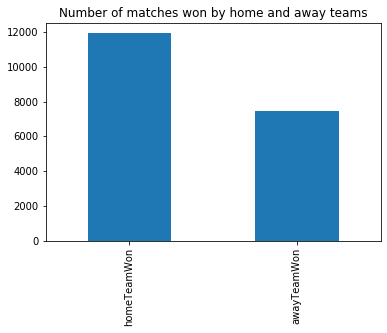

In [28]:
df_homeVsAway = new_df[["homeTeamWon" , "awayTeamWon"]]
df_homeVsAway = df_homeVsAway.sum(numeric_only=True)
df_homeVsAway.plot(kind='bar', title= 'Number of matches won by home and away teams' )


Text(0, 0.5, 'number of matches ')

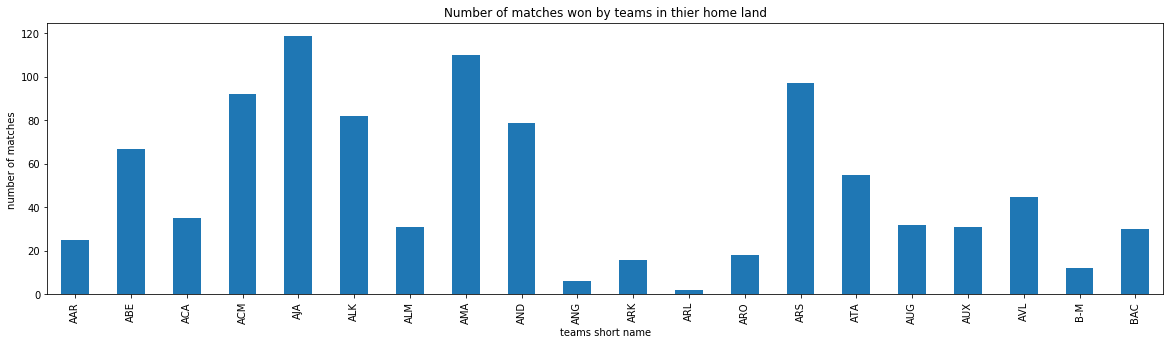

In [33]:
df_teams_win_in_homeLand = new_df.groupby('home_team_short_name')['homeTeamWon'].sum()
team_plot_h = df_teams_win_in_homeLand.iloc[0:20].plot(kind='bar', figsize=(20,5) , title= 'Number of matches won by a sample of teams at home' )

team_plot_h.set_xlabel("teams short name")
team_plot_h.set_ylabel("number of matches ")
#new_df.groupby('home_team_short_name')['homeTeamWon'].sum().plot(kind='bar', figsize=(90,50) , title= 'Number of matches won by teams in thier home land' )

Text(0, 0.5, 'number of matches ')

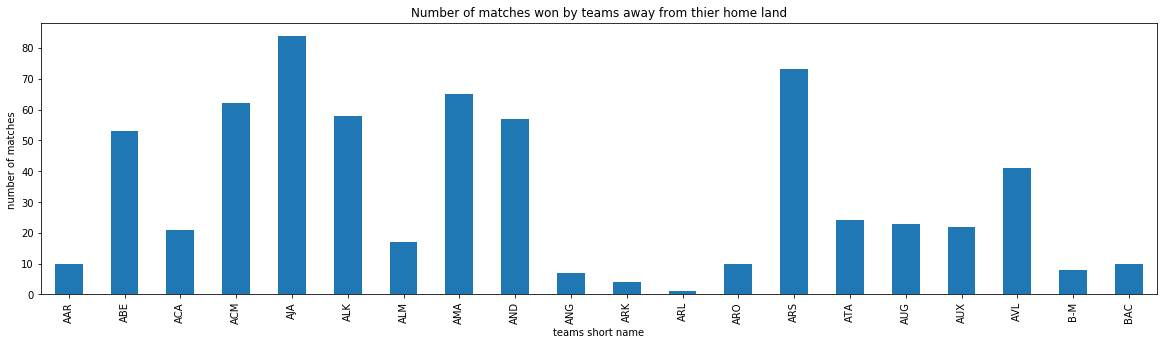

In [34]:
df_teams_win_away = new_df.groupby('away_team_short_name')['awayTeamWon'].sum()
team_plot_a = df_teams_win_away.iloc[0:20].plot(kind='bar', figsize=(20,5),title= 'Number of matches won by a sample teams away' )
team_plot_a.set_xlabel("teams short name")
team_plot_a.set_ylabel("number of matches ")

#new_df.groupby('away_team_short_name')['awayTeamWon'].sum().plot(kind='bar', figsize=(90,50), title= 'Number of matches won by teams away from thier home land' )

# <span style="color:red">3) Does a goalkeeper's age affect his reflexes?</span>

In [ ]:
Player3Imp =PlayerDF[['player_api_id','player_name','birthday']]
Player4Imp =Player_Attributes[['player_api_id','date','gk_reflexes']]

PlayerDF1 = pd.merge(Player3Imp, Player4Imp, on='player_api_id',how='inner')
PlayerDF1 = PlayerDF1[~PlayerDF1.duplicated(subset=['player_api_id'])]

PlayerDF1['age'] = PlayerDF1['date'] - PlayerDF1['birthday'] 
PlayerDF1['age']=np.ceil(PlayerDF1['age']/np.timedelta64(1,'Y'))
PlayerDF1 = PlayerDF1[['player_api_id','player_name','gk_reflexes','age']]

Match1 = MatchDF
Match1.rename(columns={'home_player_1':'player_api_id'}, inplace=True)
Match1 = Match1['player_api_id']
PlayerDF1 = pd.merge(PlayerDF1, Match1, on='player_api_id',how='right')

PlayerDF1.dropna()

In [ ]:
gk_reflexes_to_age = PlayerDF1.groupby('age')[['gk_reflexes']].mean()
gk_reflexes_to_age = gk_reflexes_to_age.iloc[1:len(gk_reflexes_to_age.index )-2, :]
gk_reflexes_to_age

In [ ]:
gkChart = gk_reflexes_to_age.plot(kind = 'bar')
plt.title("Goal Keeper Reflexes with Respect to Age")
plt.xlabel("Age")
plt.ylabel("Goal Reflexes")
plt.ylim([60, 83])

# <span style="color:red">4) Does a player's height affect his heading accuracy?</span>

In [ ]:
Player3Imp1 =PlayerDF[['player_api_id','player_name','height']]
Player4Imp1 =Player_Attributes[['player_api_id','heading_accuracy']]

PlayerDF2 = pd.merge(Player3Imp1, Player4Imp1, on='player_api_id',how='inner')
PlayerDF2 = PlayerDF2[~PlayerDF2.duplicated(subset=['player_api_id'])]

PlayerDF2

In [ ]:
height_group = [] # define array structure
for height in PlayerDF2["height"]:
    if height < 160:
        height_group.append("lower than 160")
    elif  160<= height <= 165:
        height_group.append("160-165")
    elif 166 <= height <= 170:
        height_group.append("166-170")
    elif 171 <= height <= 175:
        height_group.append("171-175")
    elif 176 <= height <= 180:
        height_group.append("176-180")
    elif 181 <= height <= 185:
        height_group.append("181-185")
    elif 186 <= height <= 190:
        height_group.append("186-190")
    elif 191 <= height <= 195:
        height_group.append("191-195")
    elif 196 <= height <= 200:
        height_group.append("196-200")
    else:
        height_group.append("higher than 200")
        
new_height_df = PlayerDF2.copy()

new_height_df["height_group"] = height_group
del new_height_df["height"]

Heading_accuracy_group = []
for heading_accuracy in PlayerDF2["heading_accuracy"]:
    if heading_accuracy < 40:
        Heading_accuracy_group.append("lower than 40")
    elif 40 <= heading_accuracy <= 45:
        Heading_accuracy_group.append("40-45")
    elif 46 <= heading_accuracy <= 50:
        Heading_accuracy_group.append("46-50")
    elif 51 <= heading_accuracy <= 55:
        Heading_accuracy_group.append("51-55")
    elif 56 <= heading_accuracy <= 60:
        Heading_accuracy_group.append("56-60")
    elif 61 <= heading_accuracy <= 65:
        Heading_accuracy_group.append("61-65")
    elif 66 <= heading_accuracy <= 70:
        Heading_accuracy_group.append("66-70")    
    else:
        Heading_accuracy_group.append("Higher than 70 ")
        
new_height_df["Heading_accuracy_group"] = Heading_accuracy_group
del new_height_df["heading_accuracy"]



new_height_df.head(20)

In [ ]:
new_height_df = new_height_df[~new_height_df.player_api_id.isin(Match)]
new_height_df

In [ ]:
Player.describe()

In [ ]:
header_group_height = new_height_df.groupby('height_group')
header_group_height.size()

In [ ]:
header_group_acc = new_height_df.groupby('Heading_accuracy_group')
header_group_acc.size()

In [ ]:
to_drop = ['player_api_id',
           'player_name']
new_height_df.drop(to_drop, inplace=True, axis=1)
new_height_df

In [ ]:
plott= header_group_acc.size().plot(kind='bar')

plt.title("Heading_Accuracy")
plt.xlabel("Heading Accuracy Ranges %")
plt.ylabel("Count");

In [ ]:
plott= header_group_height.size().plot(kind='bar')

plt.title("Height")
plt.xlabel("Height Ranges in cm")
plt.ylabel("Count")

In [ ]:
x= header_group_height.size()
y= header_group_acc.size()
fig= plt.figure(figsize=(25,6))
plt.plot(x, linestyle='-')  # solid
plt.plot(y, linestyle='--') # dashed



In [ ]:
x = new_height_df.height_group
y = new_height_df.Heading_accuracy_group

fig= plt.figure(figsize=(25,6))
plt.scatter(x,y, c='r', alpha=0.5)
plt.scatter(y,x, c='b', alpha=0.5)

plt.xlabel("x");